In [1]:
from tardis import run_tardis
from tardis.io.atom_data.util import download_atom_data

/home/student/anaconda3/envs/tardis/lib/python3.6/importlib/_bootstrap.py:219: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/home/student/Downloads/tardis/tardis/io/util.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
download_atom_data('kurucz_cd23_chianti_H_He')

[tardis.io.atom_data.atom_web_download][INFO   ]  Downloading atomic data from https://media.githubusercontent.com/media/tardis-sn/tardis-refdata/master/atom_data/kurucz_cd23_chianti_H_He.h5 to /home/student/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5 (atom_web_download.py:47)


In [4]:
sim = run_tardis('tardis_example.yml')

[tardis.plasma.standard_plasmas][INFO   ]  Reading Atomic Data from kurucz_cd23_chianti_H_He.h5 (standard_plasmas.py:74)
[tardis.io.atom_data.util][INFO   ]  Atom Data kurucz_cd23_chianti_H_He.h5 not found in local path. Exists in TARDIS Data repo /home/student/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5 (util.py:29)
[py.warnings         ][WARNING]  /home/student/anaconda3/envs/tardis/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3331: PerformanceWarning: indexing past lexsort depth may impact performance.
  exec(code_obj, self.user_global_ns, self.user_ns)
 (warnings.py:99)
[tardis.io.atom_data.base][INFO   ]  Read Atom Data with UUID=6f7b09e887a311e7a06b246e96350010 and MD5=864f1753714343c41f99cb065710cace. (base.py:184)
[tardis.io.atom_data.base][INFO   ]  Non provided atomic data: synpp_refs, photoionization_data (base.py:187)
[tardis.simulation.base][INFO   ]  Starting iteration 1/20 (base.py:268)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 7.96915

[tardis.simulation.base][INFO   ]  t_inner 10123.177 K -- next t_inner 11180.783 K (base.py:352)
[tardis.simulation.base][INFO   ]  Starting iteration 10/20 (base.py:268)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.28170e+43 erg / s Luminosity absorbed = 4.19511e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:359)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      10666.223660  11427.410445  0.445097  0.500788
	5      11000.288585  11612.349822  0.163424  0.193129
	10     10822.884326  11373.245169  0.101641  0.121622
	15     10384.181273  11047.955461  0.078432  0.090937

 (base.py:350)
[tardis.simulation.base][INFO   ]  t_inner 11180.783 K -- next t_inner 10164.432 K (base.py:352)
[tardis.simulation.base][INFO   ]  Starting iteration 11/20 (base.py:268)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 8.79074e+42 erg / s Lum

[tardis.simulation.base][INFO   ]  t_inner 10314.623 K -- next t_inner 11009.102 K (base.py:352)
[tardis.simulation.base][INFO   ]  Starting iteration 20/20 (base.py:268)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.21062e+43 erg / s Luminosity absorbed = 3.88405e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:359)
[tardis.simulation.base][INFO   ]  Simulation finished in 20 iterations and took 41.19 s (base.py:308)


Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


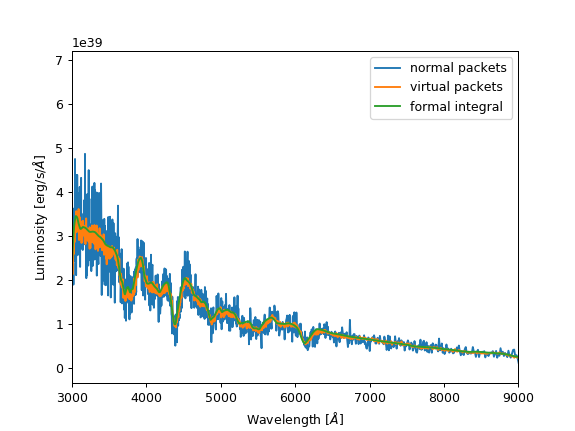

(3000, 9000)

In [5]:
%pylab notebook

spectrum = sim.runner.spectrum
spectrum_virtual = sim.runner.spectrum_virtual
spectrum_integrated = sim.runner.spectrum_integrated

plot(spectrum.wavelength, spectrum.luminosity_density_lambda, label='normal packets')
plot(spectrum.wavelength, spectrum_virtual.luminosity_density_lambda, label='virtual packets')
plot(spectrum.wavelength, spectrum_integrated.luminosity_density_lambda, label='formal integral')
xlabel('Wavelength [$\AA$]')
ylabel('Luminosity [erg/s/$\AA$]')
legend()
xlim(3000, 9000)

In [6]:
import pandas as pd

data = pd.HDFStore('/home/student/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5')
set(data)

{'/atom_data',
 '/collision_data',
 '/collision_data_temperatures',
 '/ionization_data',
 '/levels',
 '/lines',
 '/macro_atom_data',
 '/macro_atom_references',
 '/zeta_data'}

In [42]:
data['ionization_data']

atomic_number  ion_number
1              1                13.598434
2              1                24.587388
               2                54.417763
3              1                 5.391715
               2                75.640094
               3               122.454354
4              1                 9.322699
               2                18.211153
               3               153.896198
               4               217.718577
5              1                 8.298019
               2                25.154830
               3                37.930580
               4               259.371500
               5               340.226008
6              1                11.260300
               2                24.384500
               3                47.887780
               4                64.493510
               5               392.090500
               6               489.993177
7              1                14.534130
               2                29.601250
        

In [44]:
dr = data['ionization_data'].to_dict()
dr

{(1, 1): 13.598434005136,
 (2, 1): 24.587387936,
 (2, 2): 54.41776311,
 (3, 1): 5.391714761,
 (3, 2): 75.6400937,
 (3, 3): 122.4543538,
 (4, 1): 9.322699,
 (4, 2): 18.211153,
 (4, 3): 153.896198,
 (4, 4): 217.7185766,
 (5, 1): 8.298019,
 (5, 2): 25.15483,
 (5, 3): 37.93058,
 (5, 4): 259.3715,
 (5, 5): 340.226008,
 (6, 1): 11.2603,
 (6, 2): 24.3845,
 (6, 3): 47.88778,
 (6, 4): 64.49351,
 (6, 5): 392.0905,
 (6, 6): 489.993177,
 (7, 1): 14.53413,
 (7, 2): 29.60125,
 (7, 3): 47.4453,
 (7, 4): 77.4735,
 (7, 5): 97.89013,
 (7, 6): 552.06731,
 (7, 7): 667.04609,
 (8, 1): 13.618054,
 (8, 2): 35.12111,
 (8, 3): 54.93554,
 (8, 4): 77.4135,
 (8, 5): 113.8989,
 (8, 6): 138.1189,
 (8, 7): 739.32679,
 (8, 8): 871.40985,
 (9, 1): 17.42282,
 (9, 2): 34.97081,
 (9, 3): 62.708,
 (9, 4): 87.175,
 (9, 5): 114.249,
 (9, 6): 157.1631,
 (9, 7): 185.1868,
 (9, 8): 953.898,
 (9, 9): 1103.11743,
 (10, 1): 21.56454,
 (10, 2): 40.96296,
 (10, 3): 63.42331,
 (10, 4): 97.19,
 (10, 5): 126.247,
 (10, 6): 157.934,
 (

In [24]:
dc = data['zeta_data'].to_dict()
dc

{2000.0: {(1, 1): 0.339,
  (1, 2): 0.0,
  (2, 1): 0.4012,
  (2, 2): 0.266,
  (2, 3): 0.0,
  (3, 1): 0.2044,
  (3, 2): 0.211,
  (3, 3): 0.2348,
  (4, 1): 0.5261,
  (4, 2): 0.1851,
  (4, 3): 0.1745,
  (4, 4): 0.2159,
  (5, 1): 0.5325,
  (5, 2): 0.5393,
  (5, 3): 0.1767,
  (5, 4): 0.1523,
  (5, 5): 0.2039,
  (6, 1): 0.5975,
  (6, 2): 0.4669,
  (6, 3): 0.3092,
  (6, 4): 0.1645,
  (6, 5): 0.1481,
  (6, 6): 0.1951,
  (6, 7): 0.0,
  (7, 1): 0.4497,
  (7, 2): 0.4377,
  (7, 3): 0.3023,
  (7, 4): 0.2813,
  (7, 5): 0.18,
  (7, 6): 0.1337,
  (7, 7): 0.1882,
  (7, 8): 0.0,
  (8, 1): 0.3621,
  (8, 2): 0.3429,
  (8, 3): 0.3715,
  (8, 4): 0.2892,
  (8, 5): 0.2627,
  (8, 6): 0.1599,
  (8, 7): 0.1244,
  (8, 8): 0.1827,
  (8, 9): 0.0,
  (9, 1): 0.6675,
  (9, 2): 0.0461,
  (9, 3): 0.3265,
  (9, 4): 0.2379,
  (9, 5): 0.2401,
  (9, 6): 0.1359,
  (9, 7): 0.1499,
  (9, 8): 0.1194,
  (9, 9): 0.1767,
  (10, 1): 0.1114,
  (10, 2): 0.1625,
  (10, 3): 0.394,
  (10, 4): 0.279,
  (10, 5): 0.2321,
  (10, 6): 0.2031,


In [54]:
Gr = nx.DiGraph(dc)
Gr

In [50]:
df = data['collision_data_temperatures']
dfValues = df.values

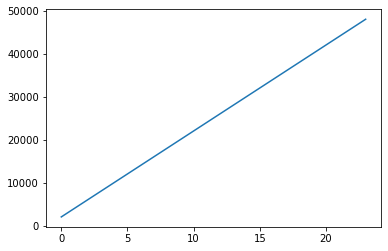

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
g = plt.plot(dfValues)

In [51]:
import networkx as nx
import pygraphviz
from networkx.drawing.nx_agraph import write_dot

In [55]:
G = nx.grid_2d_graph(5,5)  # 5x5 grid
write_dot(Gr,'grid.dot')

In [56]:
from graphviz import Source
path = 'grid.dot'
s = Source.from_file(path)
s.view()

'grid.dot.pdf'